In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\PMLS\Downloads\archive\HDHI Admission data.csv")

# View basic structure
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   SNO                              15757 non-null  int64 
 1   MRD No.                          15757 non-null  object
 2   D.O.A                            15757 non-null  object
 3   D.O.D                            15757 non-null  object
 4   AGE                              15757 non-null  int64 
 5   GENDER                           15757 non-null  object
 6   RURAL                            15757 non-null  object
 7   TYPE OF ADMISSION-EMERGENCY/OPD  15757 non-null  object
 8   month year                       15757 non-null  object
 9   DURATION OF STAY                 15757 non-null  int64 
 10  duration of intensive unit stay  15757 non-null  int64 
 11  OUTCOME                          15757 non-null  object
 12  SMOKING                         

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.rename(columns={
    'AGE': 'age',
    'GENDER': 'gender',
    'TYPE OF ADMISSION-EMERGENCY/OPD': 'admission_type',
    'D.O.A': 'admission_date'
}, inplace=True)

df['admission_date'] = pd.to_datetime(df['admission_date'], errors='coerce')
df['admission_day'] = df['admission_date'].dt.day_name()


In [8]:
age_bins = [0, 18, 30, 45, 60, 75, 90, 120]
age_labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76-90', '91+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)


In [9]:
print("Total Admissions:", len(df))
print("\nGender Distribution:")
print(df['gender'].value_counts())

print("\nAdmission Types:")
print(df['admission_type'].value_counts())

print("\nMost Common Age Groups:")
print(df['age_group'].value_counts().sort_index())

print("\nAdmissions by Day of the Week:")
print(df['admission_day'].value_counts().sort_index())


Total Admissions: 15757

Gender Distribution:
gender
M    9990
F    5767
Name: count, dtype: int64

Admission Types:
admission_type
E    10924
O     4833
Name: count, dtype: int64

Most Common Age Groups:
age_group
0-18       73
19-30     319
31-45    1449
46-60    5300
61-75    6535
76-90    2021
91+        60
Name: count, dtype: int64

Admissions by Day of the Week:
admission_day
Friday       1439
Monday       1614
Saturday     1393
Sunday       1286
Thursday     1441
Tuesday      1556
Wednesday    1373
Name: count, dtype: int64


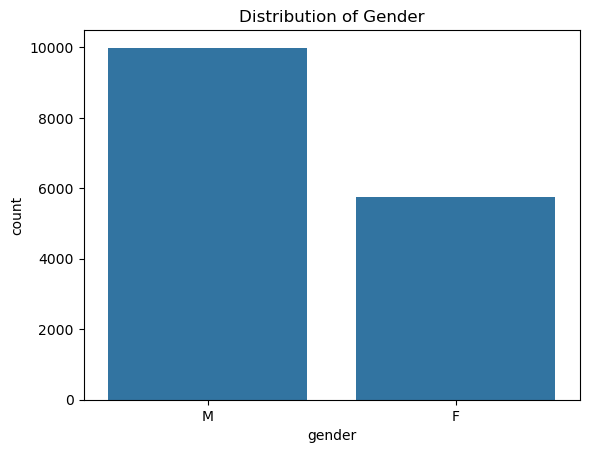

In [10]:
sns.countplot(data=df, x='gender')
plt.title("Distribution of Gender")
plt.show()


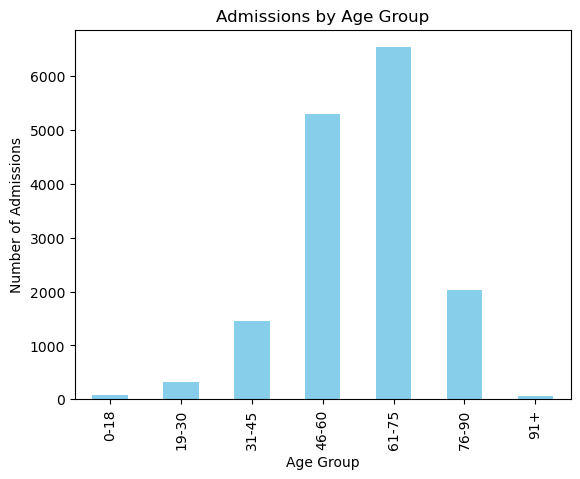

In [11]:
df['age_group'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Admissions by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Admissions")
plt.show()


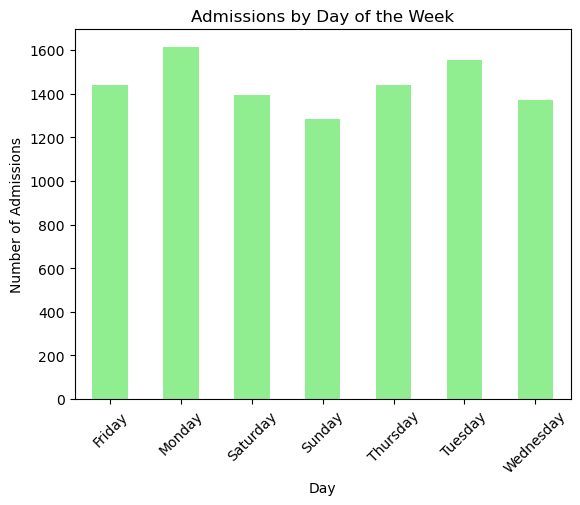

In [12]:
df['admission_day'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title("Admissions by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Admissions")
plt.xticks(rotation=45)
plt.show()


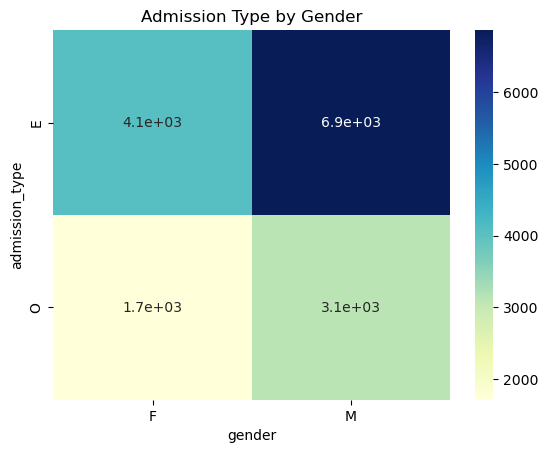

In [13]:
ct = pd.crosstab(df['admission_type'], df['gender'])
sns.heatmap(ct, annot=True, cmap="YlGnBu")
plt.title("Admission Type by Gender")
plt.show()


In [14]:
print("Gender vs Admission Type Table:")
display(pd.crosstab(df['gender'], df['admission_type']))

print("\nAge Group Summary Table:")
display(df['age_group'].value_counts().sort_index())

print("\nAdmission Day Summary Table:")
display(df['admission_day'].value_counts().sort_index())


Gender vs Admission Type Table:


admission_type,E,O
gender,,
F,4055,1712
M,6869,3121



Age Group Summary Table:


age_group
0-18       73
19-30     319
31-45    1449
46-60    5300
61-75    6535
76-90    2021
91+        60
Name: count, dtype: int64


Admission Day Summary Table:


admission_day
Friday       1439
Monday       1614
Saturday     1393
Sunday       1286
Thursday     1441
Tuesday      1556
Wednesday    1373
Name: count, dtype: int64